Data is located in gs://${GCS_BUCKET}/datasets.      
There should be bird, dog_breed, food, fungus, leaf folder.

The original zipped file is there.
The processed folder is also there

In [ ]:
!gsutil ls gs://${GCS_BUCKET}/datasets

In [ ]:
!mkdir -p data

# Download

In [ ]:
!gsutil -m cp -r  gs://${GCS_BUCKET}/datasets/dog_breed/* data/

In [ ]:
! ls data/processed

In [1]:
import sys
sys.path.append("/home/ubuntu/fastai/")

In [2]:
import fastai
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
import helper


In [3]:
import pandas as pd
from tqdm import tqdm
import hashlib
from glob import glob


In [4]:
%matplotlib inline
%load_ext autoreload

%autoreload 2

# Generate labels.csv

In [5]:
!pwd

/home/ubuntu/deep_learning_workshop/training


In [6]:
!ls dog_breed

affenpinscher			italian_greyhound
afghan_hound			japanese_spaniel
african_hunting_dog		keeshond
airedale			kelpie
american_staffordshire_terrier	kerry_blue_terrier
appenzeller			komondor
australian_terrier		kuvasz
basenji				labrador_retriever
basset				lakeland_terrier
beagle				leonberg
bedlington_terrier		lhasa
bernese_mountain_dog		malamute
black-and-tan_coonhound		malinois
blenheim_spaniel		maltese_dog
bloodhound			mexican_hairless
bluetick			miniature_pinscher
border_collie			miniature_poodle
border_terrier			miniature_schnauzer
borzoi				newfoundland
boston_bull			norfolk_terrier
bouvier_des_flandres		norwegian_elkhound
boxer				norwich_terrier
brabancon_griffon		old_english_sheepdog
briard				otterhound
brittany_spaniel		papillon
bull_mastiff			pekinese
cairn				pembroke
cardigan			pomeranian
chesapeake_bay_retriever	pug
chihuahua			redbone
chow				rhodesian_ridgeback
clumber				rottweiler
cocker_spaniel			saint_bernard
collie				saluki
curly-coated_retriever		samoyed
dandie_di

In [7]:


BASE_PATH= "dog_breed/"

records = []
for image in glob(f"{BASE_PATH}**/*.jpg"):
    dir_ = image.split('/')
    file_, species = dir_[-1], dir_[-2]

    records.append({
        "file": image,
        "class": species.replace(" ", "_")
    })

labels_df = pd.DataFrame(records)
labels_df.to_csv('labels.csv', index=False)

In [8]:
labels_df.head()

class                                               file
0  boxer  dog_breed/boxer/436183cf47381b7d57c86ab35c41a4...
1  boxer  dog_breed/boxer/85bb4a7d4ace6c2464e7969b99403b...
2  boxer  dog_breed/boxer/4e0ffeab743baa4d6061e3d35fa4c4...
3  boxer  dog_breed/boxer/a72e49a69c8409fed67c47bba4c4f1...
4  boxer  dog_breed/boxer/9a1fe5b5e1cfb439566e412634730a...

In [9]:
num_classes = len(labels_df['class'].unique())
num_classes

120

In [10]:
labels_df['class'].value_counts()

scottish_deerhound                126
maltese_dog                       117
afghan_hound                      116
entlebucher                       115
bernese_mountain_dog              114
shih-tzu                          112
great_pyrenees                    111
pomeranian                        111
basenji                           110
samoyed                           109
tibetan_terrier                   107
airedale                          107
cairn                             106
leonberg                          106
beagle                            105
japanese_spaniel                  105
blenheim_spaniel                  102
miniature_pinscher                102
australian_terrier                102
irish_wolfhound                   101
lakeland_terrier                   99
saluki                             99
papillon                           96
whippet                            95
siberian_husky                     95
norwegian_elkhound                 95
pug         

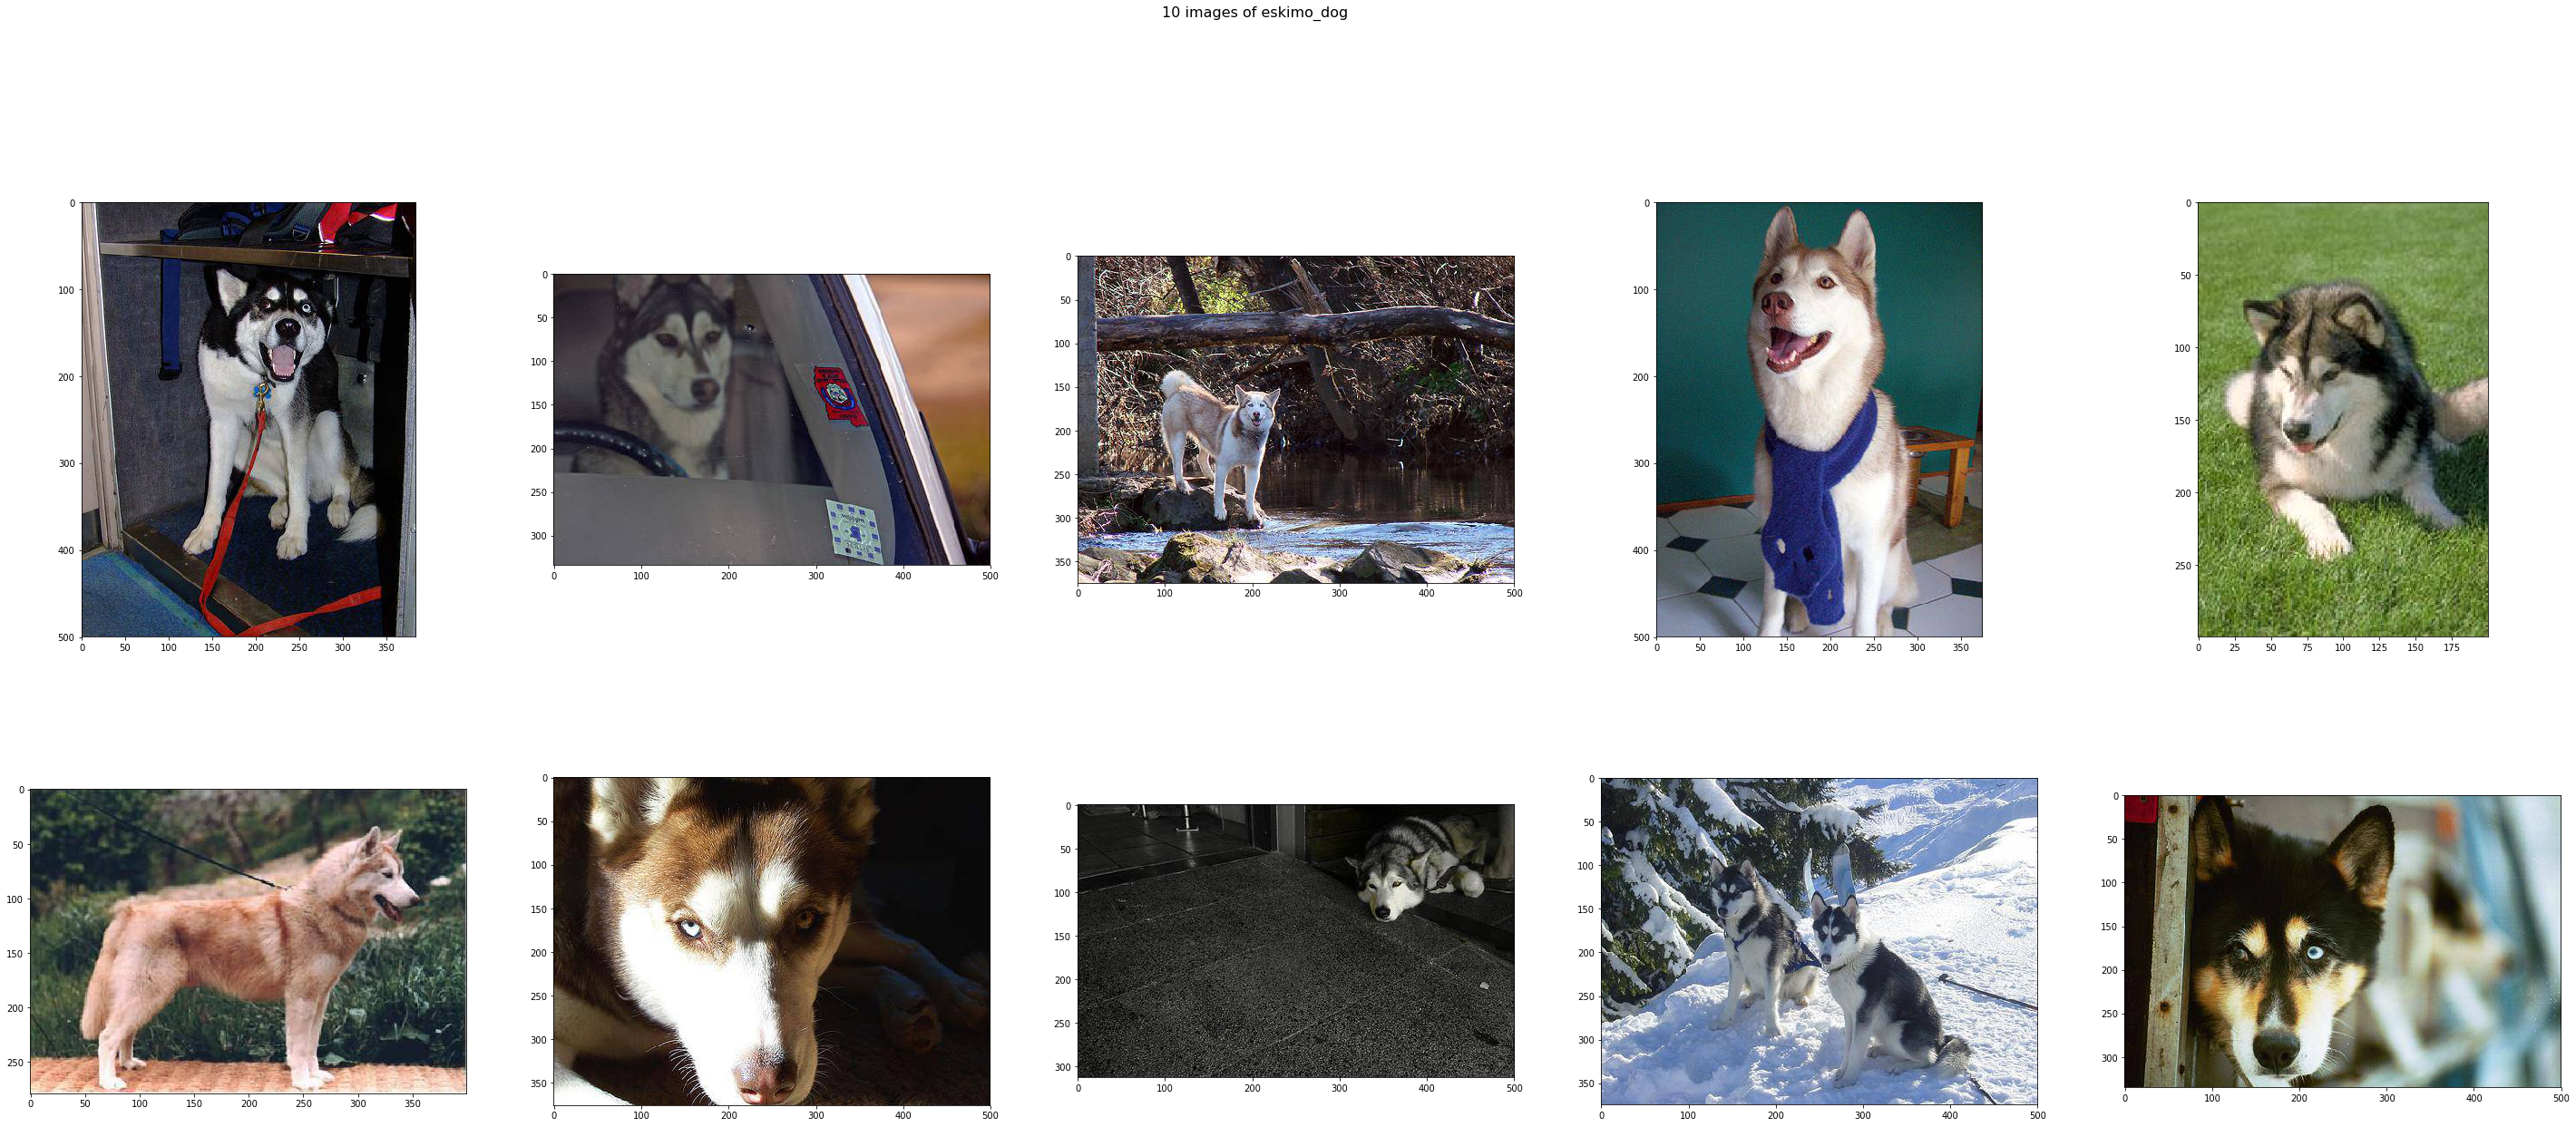

In [11]:
helper.display_images_from_class(labels_df,label='eskimo_dog',num_images=10 )

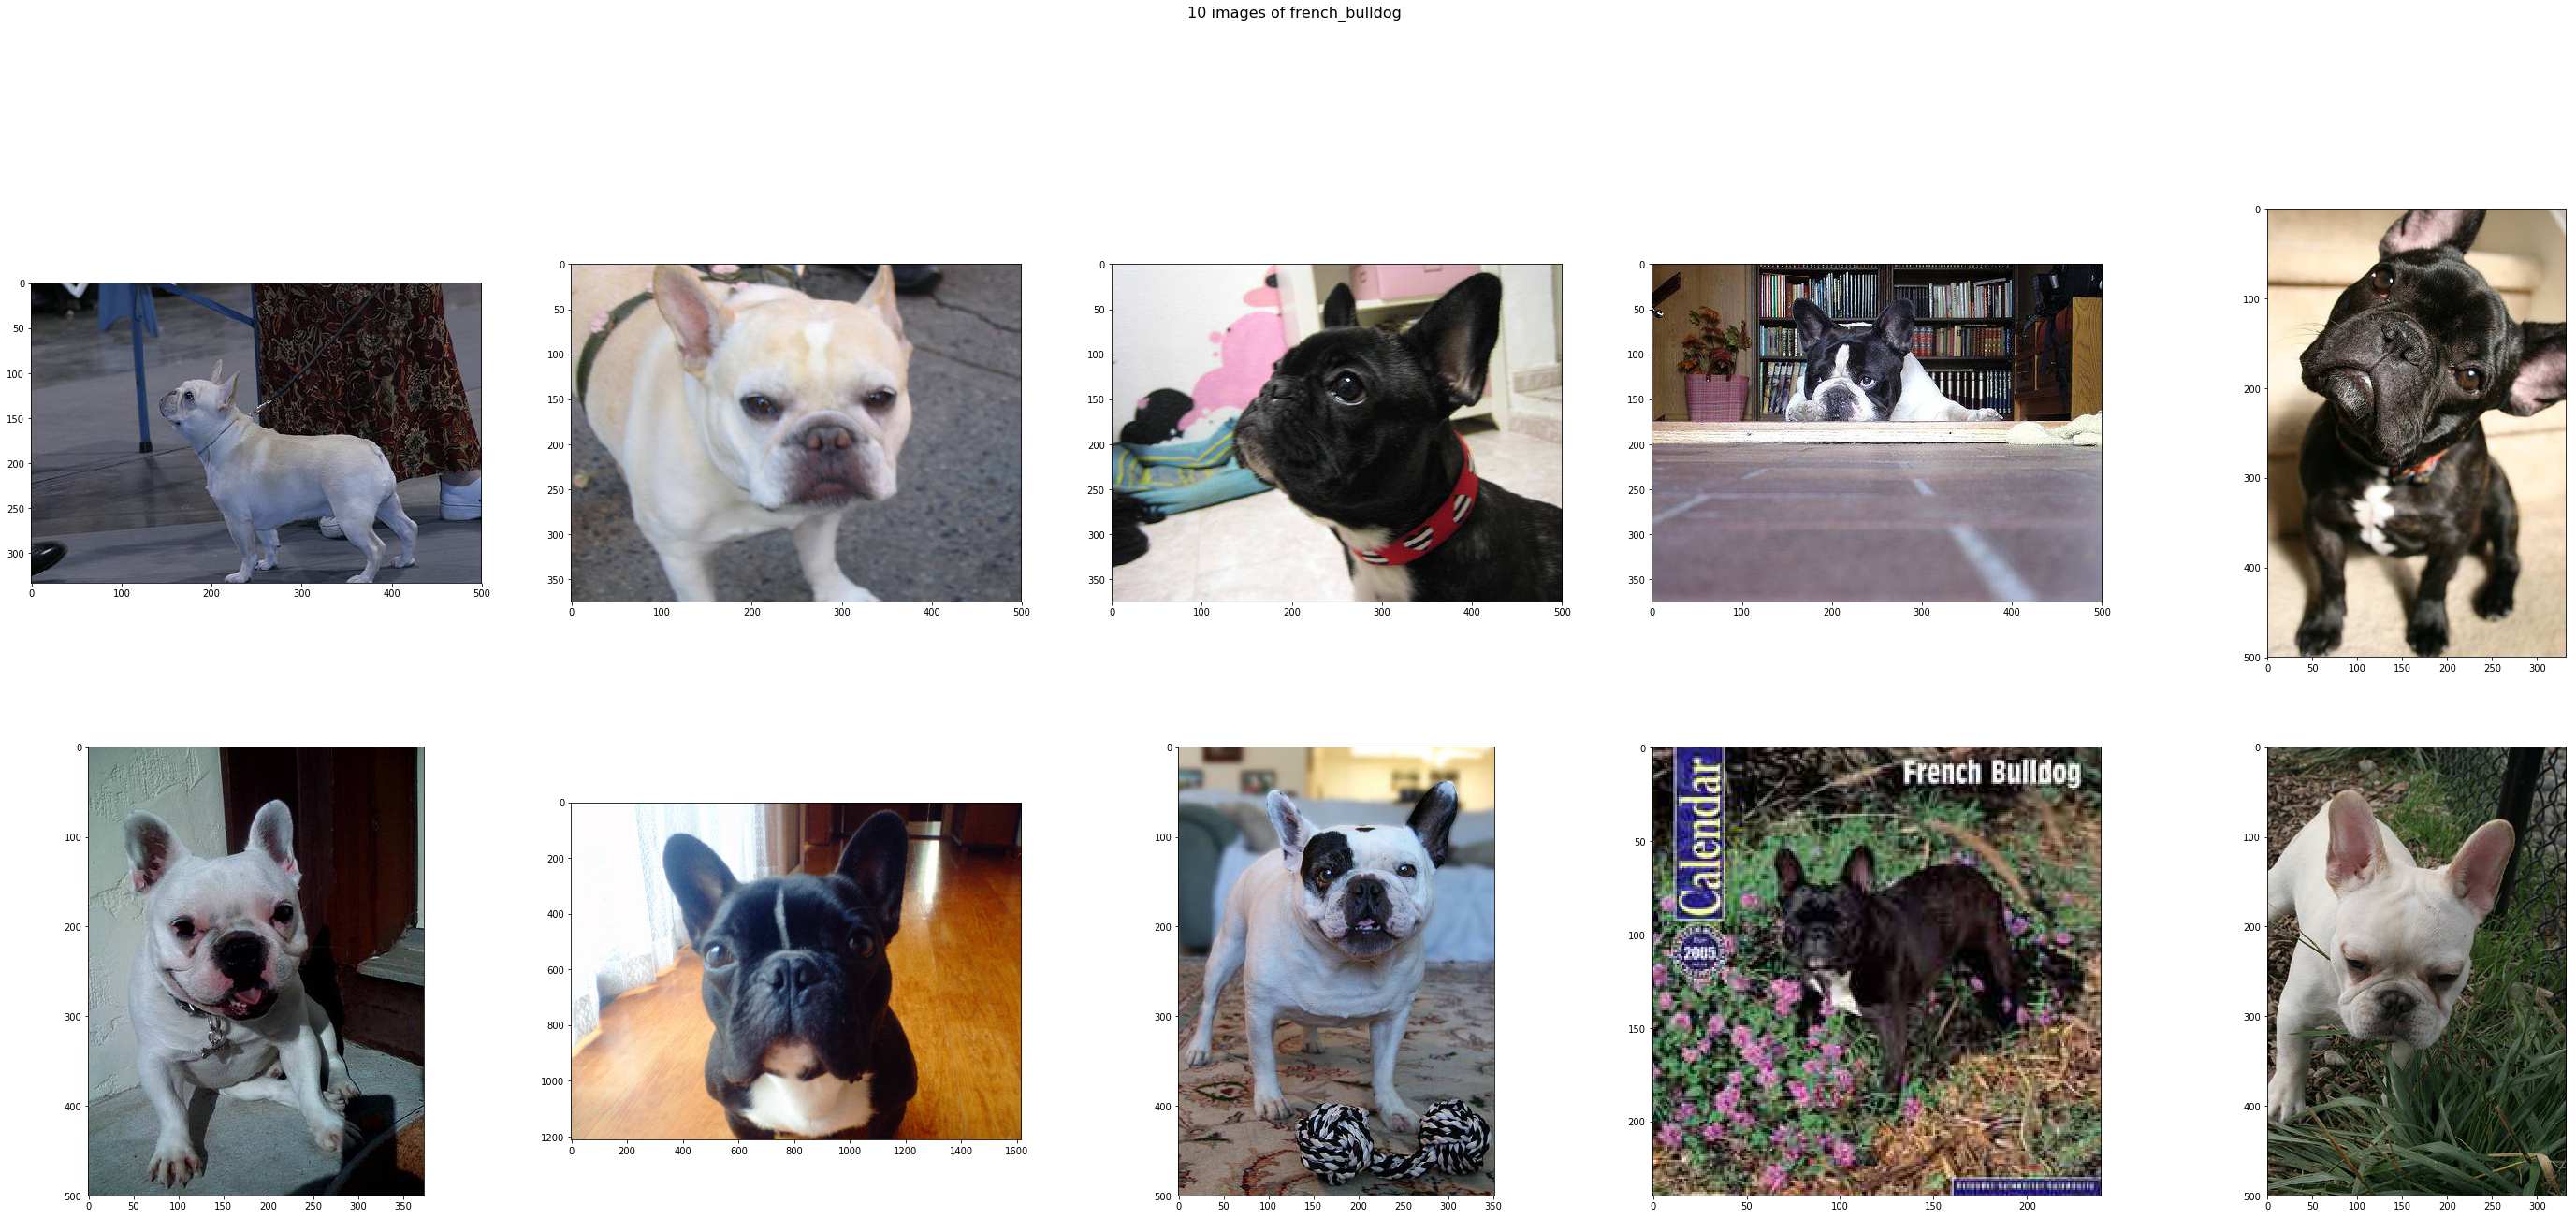

In [12]:
helper.display_images_from_class(labels_df,label='french_bulldog',num_images=10 )

In [13]:
PATH = "data/processed/"


**Save only first n classes **

In [14]:
n = num_classes
topn_classes = labels_df['class'].value_counts()[0:n].index.tolist()

In [15]:
labels_df=labels_df[labels_df['class'].isin(topn_classes)]

In [ ]:
labels_df.to_csv('labels.csv')

** Validation data **

In [ ]:
label_csv = f'labels.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)


In [ ]:
def save_images(list_images,dest='train'):
    for img_path in tqdm(list_images):
        paths = img_path.split("/")
        class_name, img_file = paths[-2],paths[-1]
        
        os.makedirs(f"{dest}/{class_name}",exist_ok=True)
        shutil.copy(img_path,f"{dest}/{class_name}/{img_file}")
        

In [ ]:
shutil.rmtree('data/train',ignore_errors=True)
shutil.rmtree('data/valid',ignore_errors=True)

In [ ]:
save_images(labels_df.iloc[val_idxs]['file'], dest='data/valid')
train_set = labels_df[~labels_df.index.isin(val_idxs)]
save_images(train_set['file'], dest='data/train')